In [1]:
from pathlib import Path
import pandas
import numpy

In [2]:
data = Path("../data")
data_files_atom = list(filter(lambda x: "atom" in x, map(lambda x:str(x),data.iterdir())))
print(f"For opening atom {data_files_atom}")
data_files_nano = list(filter(lambda x: "sh" in x, map(lambda x:str(x),data.iterdir())))
print(f"For opening nano {data_files_nano}")
data_files_leafpad = list(filter(lambda x: "leafpad" in x, map(lambda x:str(x),data.iterdir())))
print(f"For opening leafpad {data_files_leafpad}")
data_files_ls = list(filter(lambda x: "ls" in x, map(lambda x:str(x),data.iterdir())))
print(f"For running ls {data_files_ls}")

For opening atom ['../data/6313_atom.csv', '../data/781_atom.csv', '../data/1274_atom.csv', '../data/5833_atom.csv', '../data/5004_atom.csv', '../data/32374_atom.csv', '../data/2875_atom.csv', '../data/4804_atom.csv', '../data/26500_atom.csv', '../data/2312_atom.csv', '../data/6529_atom.csv', '../data/30423_atom.csv', '../data/5345_atom.csv', '../data/2694_atom.csv', '../data/5949_atom.csv', '../data/31276_atom.csv', '../data/5164_atom.csv', '../data/5117_atom.csv', '../data/8254_atom.csv', '../data/5599_atom.csv', '../data/32714_atom.csv', '../data/26069_atom.csv', '../data/8624_atom.csv', '../data/531_atom.csv', '../data/32083_atom.csv', '../data/1793_atom.csv', '../data/23622_atom.csv', '../data/4979_atom.csv', '../data/29653_atom.csv', '../data/655_atom.csv', '../data/29310_atom.csv', '../data/3057_atom.csv', '../data/1451_atom.csv', '../data/28124_atom.csv', '../data/7755_atom.csv', '../data/6781_atom.csv', '../data/4709_atom.csv', '../data/3916_atom.csv', '../data/3314_atom.csv',

#### Get all unique system calls

Read each exec trace and extract the unique syscall columns.

In [3]:
unique_syscalls = []
for _file in (data_files_atom + data_files_nano + data_files_leafpad + data_files_ls):
    #print(f"Reading syscalls from {_file}")
    unique_syscalls.append(pandas.Series(pandas.read_csv(_file)["event"].unique()))

# Get al unique syscalls
unique_syscalls = pandas.concat(unique_syscalls, ignore_index=True).unique()
print(unique_syscalls)

['execve' 'brk' 'access' 'openat' 'fstat' 'mmap' 'close' 'read' 'mprotect'
 'arch_prctl' 'munmap' 'getuid' 'getgid' 'geteuid' 'getegid'
 'rt_sigprocmask' 'ioctl' 'sysinfo' 'rt_sigaction' 'uname' 'stat' 'getpid'
 'getppid' 'getpgrp' 'prlimit' 'lseek' 'fcntl' 'dup' 'pipe' 'clone'
 'switch' 'wait4' 'signaldeliver' 'sigreturn' 'faccessat' 'exit_group'
 'procexit' 'getcwd' 'getdents' 'socket' 'connect' 'write' 'chdir' 'poll'
 'set_tid_address' 'set_robust_list' 'statfs' 'futex' 'getpeername'
 'getsockname' 'writev' 'recvfrom' 'recvmsg' 'eventfd' 'lstat' 'getrandom'
 'fstatfs' 'fadvise64' 'clock_getres' 'getresuid' 'getresgid' 'mkdir'
 'inotify_init' 'inotify_add_watch' 'select' 'mremap' 'shmget' 'shmat'
 'shmctl' 'shmdt']


### Code syscalls into integers

In [4]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plotter

Encode strings into integers

In [5]:
encoder = LabelEncoder()
encoder.fit(unique_syscalls)

LabelEncoder()

#### Plotting open atom

Plot system call sequence of opening atom.

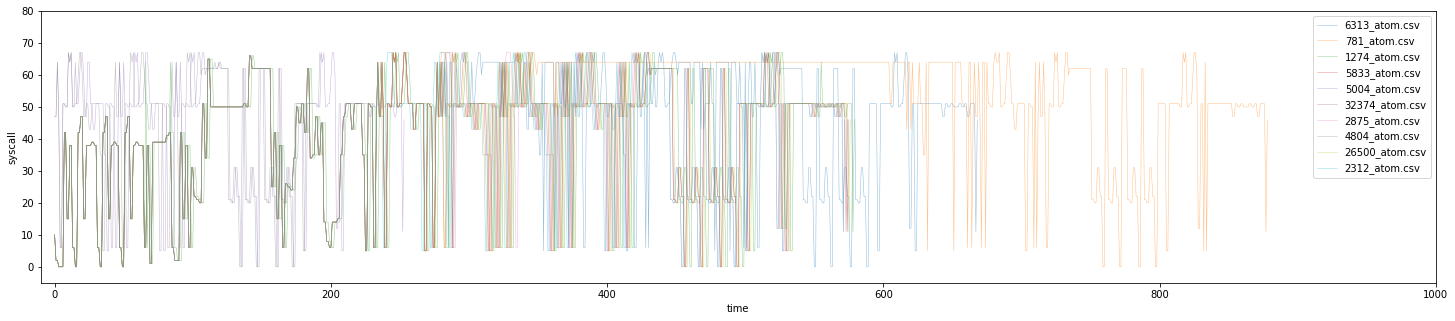

In [6]:
fig = plotter.figure(figsize=(25,5))
for _file in data_files_atom[:10]:
    data = pandas.read_csv(_file)
    plotter.plot(encoder.transform(data["event"]), label=str(_file).split("/")[-1], linewidth=0.5, alpha=0.5)
plotter.ylim(-5, unique_syscalls.shape[0]+10)
plotter.xlim(-10, 1000)
plotter.ylabel("syscall")
plotter.xlabel("time")
plotter.legend()
fig.savefig("open_atom.png")
plotter.show()

#### Plotting open leafpad

Plot system call sequence of opening leafpad.

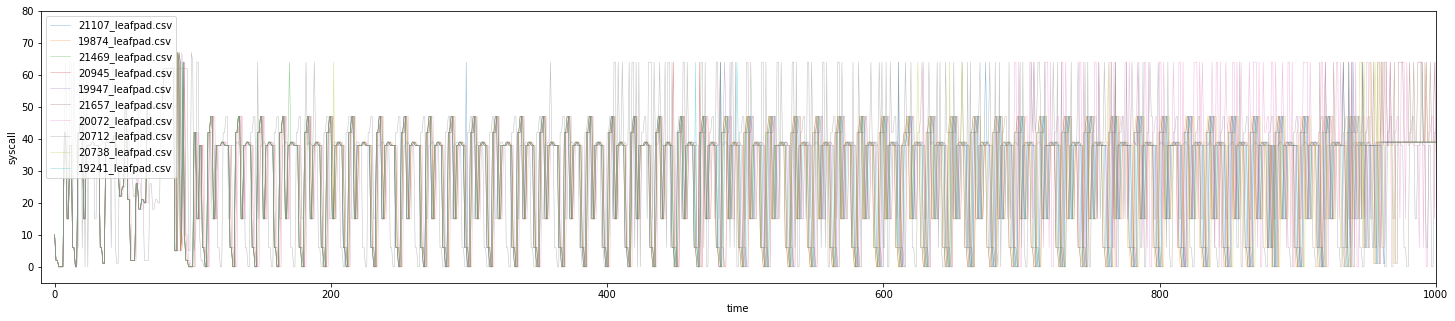

In [7]:
fig = plotter.figure(figsize=(25,5))
for _file in data_files_leafpad[:10]:
    data = pandas.read_csv(_file)
    plotter.plot(encoder.transform(data["event"]), label=str(_file).split("/")[-1], linewidth=0.5, alpha=0.5)
plotter.ylim(-5, unique_syscalls.shape[0]+10)
plotter.xlim(-10, 1000)
plotter.ylabel("syscall")
plotter.xlabel("time")
plotter.legend()
fig.savefig("open_leafpad.png")
plotter.show()

#### Plotting open nano

Plot system call sequence of opening leafpad.

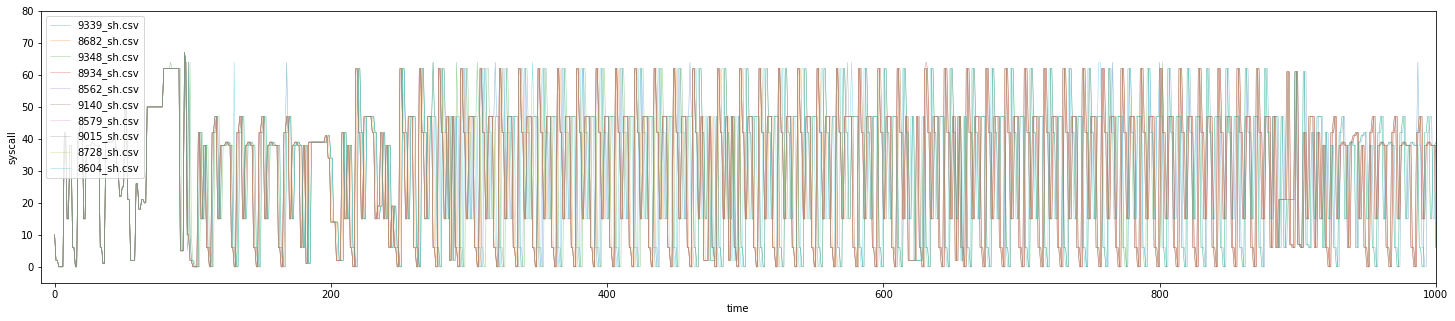

In [8]:
fig = plotter.figure(figsize=(25,5))
for _file in data_files_nano[:10]:
    data = pandas.read_csv(_file)
    plotter.plot(encoder.transform(data["event"]), label=str(_file).split("/")[-1], linewidth=0.5, alpha=0.5)
plotter.ylim(-5, unique_syscalls.shape[0]+10)
plotter.xlim(-10, 1000)
plotter.ylabel("syscall")
plotter.xlabel("time")
plotter.legend()
fig.savefig("open_nano.png")
plotter.show()

#### Plotting running ls

Plot system call sequence of opening leafpad.

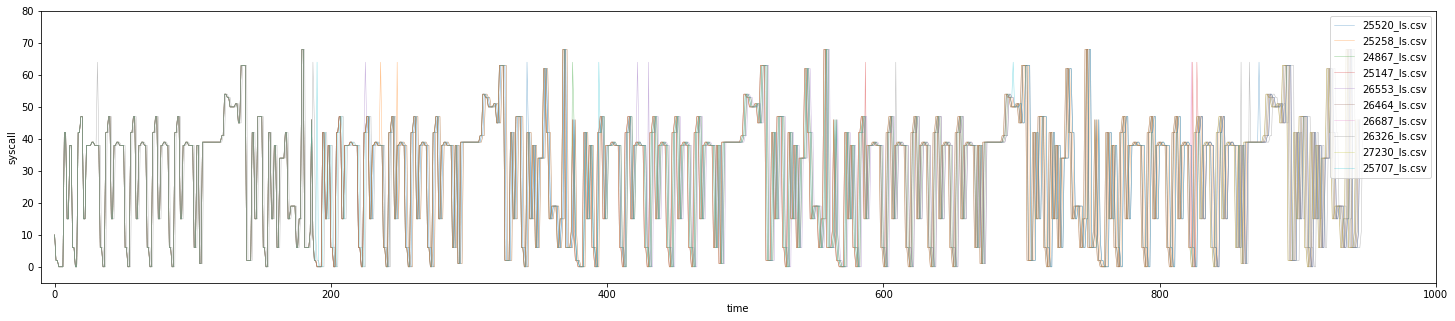

In [9]:
fig = plotter.figure(figsize=(25,5))
for _file in data_files_ls[:10]:
    data = pandas.read_csv(_file)
    plotter.plot(encoder.transform(data["event"]), label=str(_file).split("/")[-1], linewidth=0.5, alpha=0.5)
plotter.ylim(-5, unique_syscalls.shape[0]+10)
plotter.xlim(-10, 1000)
plotter.ylabel("syscall")
plotter.xlabel("time")
plotter.legend()
fig.savefig("nav.png")
plotter.show()

### Format data into splittable parts

In [10]:
# Returns slices of time series

def get_slice_arrays(series, data_len=200):
    data = []
    for i in range(series.shape[0] - (data_len)):
        data.append(series[i:i+200])
    data = numpy.array(data)
    return data

# Convert a set of recordings into a dataset

def class_dataset(data_files):
    dataset = []
    for _file in data_files:
#         print(f"Working on {_file}")
        data = encoder.transform(pandas.read_csv(_file)["event"][:1000])
        if data.shape[0] > 200:
            dataset.append(get_slice_arrays(data, 200))
    return numpy.concatenate(dataset, axis=0)

In [11]:
# sample = pandas.read_csv(data_files_ls[0])["event"]
# sample = encoder.transform(sample)
# data = get_slice_arrays(sample)
# print(data.shape)

In [12]:
# dataset = class_dataset(data_files_atom)
# print(dataset.shape)

#### Make dataset

In [13]:
# dataset of open atom sequences
open_atom_data = class_dataset(data_files_atom)
open_atom_labels = numpy.ones(open_atom_data.shape[0]) * 0.0

# dataset of open leafpad sequences
open_leafpad_data = class_dataset(data_files_leafpad)
open_leafpad_labels = numpy.ones(open_leafpad_data.shape[0]) * 1.0

# dataset of open nano sequences
open_nano_data = class_dataset(data_files_nano)
open_nano_labels = numpy.ones(open_nano_data.shape[0]) * 2.0

# dataset of ls sequences
ls_data = class_dataset(data_files_ls)
ls_labels = numpy.ones(ls_data.shape[0]) * 3.0

In [14]:
print(f"open atom {open_atom_data.shape[0]} samples")
print(f"open leafpad {open_leafpad_data.shape[0]} samples")
print(f"open nano {open_nano_data.shape[0]} samples")
print(f"ls {ls_data.shape[0]} samples")

open atom 29954 samples
open leafpad 80000 samples
open nano 80000 samples
ls 75964 samples


In [15]:
X = numpy.concatenate([open_atom_data, open_leafpad_data, open_nano_data, ls_data], axis=0)
y = numpy.concatenate([open_atom_labels, open_leafpad_labels, open_nano_labels, ls_labels], axis=0)
print(f"Dataset of shape {X.shape} created.")
print(f"Labels of shape {y.shape} created.")

Dataset of shape (265918, 200) created.
Labels of shape (265918,) created.


### Store data

In [16]:
del open_atom_data
del open_atom_labels
del open_leafpad_data
del open_leafpad_labels
del open_nano_data
del open_nano_labels
del ls_data
del ls_labels

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
# splitter = ShuffleSplit(n_splits=10000, test_size=0.0)
X = scaler.fit_transform(X)
X, y = shuffle(X, y)

/home/adityas/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
for i in range(0, X.shape[0], 10000):
    numpy.save(f"dataset/batch_{i}", X[i:i+10000, :])
    numpy.save(f"dataset/label_{i}", y[i:i+10000])